# **Esercizi extra - parte 2**

In questo notebook troviamo esercizi relativi alla prima parte del programma di numerica, di vario grado di difficoltà (indicato nel testo).

# **Interpolazione**

### Esercizio 1

*Difficoltà: facile.*

Abbiamo a disposizione il valore della resistenza aerodinamica (drag) di un veicolo per diversi
valori della velocità. I dati sono salvati come v e D nel file drag.txt e possono essere caricati
con il comando numpy.loadtxt. 

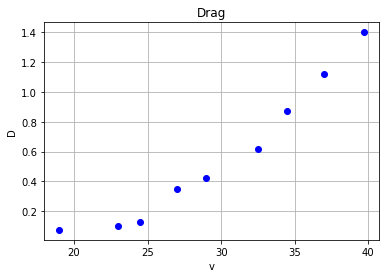

In [1]:
# step 0 -> ricordarsi di importare i pacchetti numpy and matplotlib

import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
data = np.loadtxt('drag.txt')

# rappresentazione grafica
plt.plot(data[:,0], data[:,1],'bo',linewidth=2.0)
# specifiche grafiche titolo, legenda, grid,
plt.title("Drag")
plt.xlabel('v')
plt.ylabel('D')
plt.grid()
plt.show()

Calcolare il polinomio ai minimi quadrati che approssima i dati forniti, scegliendo il grado
polinomiale pari a 1, 2 e 3.

Rappresentare i dati forniti e le tre curve approssimanti calcolate al punto precedente sulla
stessa figura. Cosa si osserva?

Per un’analisi più quantitativa, per i tre casi considerati calcolare la quantità
$$e^2= \displaystyle \sum_{i=0}^N (D_i - \pi_m(v_i))^2$$
dove $\pi_m$ indica l'approssimante ai minimi quadrati di grado $m$, nel nostro caso $m=1,2,3$, e $N+1$ \`e il numero di punti. 

Notiamo che passando da $m=1$ a $m=2$ si ottieneun netto miglioramento, mentre non si notano grandi miglioramenti passando al grado 3. Infatti, il grado 2 rispecchia la dipendenza "reale" della resistenza dalla velocità. 

# **Interpolazione**

### Esercizio 2

*Difficoltà: facile.*

Si consideri la seguente funzione:

$$r(x) = \dfrac{1}{2}+  \dfrac{1}{2} \sin(2\pi x)(1-x)$$

che descrive, per $a\leq x\leq b$, il raggio di un solido di rotazione il cui asse coincide con l'asse $x$ (si veda la figura)

![vaso.png](vaso.png)

Fissati $a=0$, $b=1$, vogliamo calcolarne il volume.

Definire la funzione da integrare.

Calcolare il volume del solido con un metodo numerico a scelta, utilizzando $N = 10$ intervalli.

Ripetere il calcolo con N = 20, N = 40, N = 80. Si commenti il risultato ottenuto.

### Esercizio 3

*Difficoltà: facile.*

Abbiamo a disposizione il valore della velocità di un veicolo in funzione del tempo. I dati sono salvati come t (tempo) e v (velocità) nel file speed.txt e possono essere caricati con il comando numpy.loadtxt. 

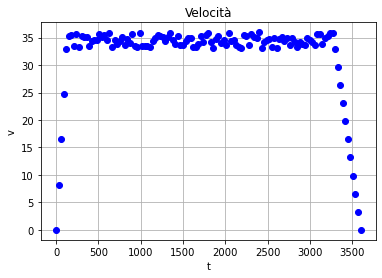

In [2]:
# step 0 -> ricordarsi di importare i pacchetti numpy and matplotlib

import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
data = np.loadtxt('speed.txt')

# rappresentazione grafica
plt.plot(data[:,0], data[:,1],'bo',linewidth=2.0)
# specifiche grafiche titolo, legenda, grid,
plt.title("Velocità")
plt.xlabel('t')
plt.ylabel('v')
plt.grid()
plt.show()

Vogliamo calcolare lo spazio percorso integrando numericamente la velocità istantanea. 
Determinare, a partire dal vettore di tempi $t$, l’intervallo $t ∈ [t_{min} , t_{max} ]$ e il numero di
sottointervalli.

Dato che la velocità istantanea non è fornita come funzione, ma solo attraverso i suoi valori in alcuni istanti discreti, implementare una versione modificata del metodo dei trapezi (composito) che possa ricevere in ingresso tale input.

Chiamiamo la function fornendo in input i dati caricati.

Approssimare i dati forniti con un polinomio ai minimi quadrati di grado 4.

Costruire la corrisponente funzione e integrarla con la function trapcomp fornita a lezione. Confrontare il risultato ottenuto con quello del punto precedente.

# **Approssimazione di derivate**

### Esercizio 4

*Difficoltà: facile.*

Consideriamo la seguente legge del moto

$$s(t) = \exp\left(-\frac{t}{10}\right)\cos(t)$$

dove s rappresenta la posizione di un corpo lungo una linea in funzione del tempo. Consideriamo
l’intervallo di tempo $t \in [0, 10]$.

Suddividere l’intervallo di tempo con un passo $h = 0.5$ e calcolare la derivata prima approssimata $\delta s$ in tutti i punti $t_i = ih$. Utilizzare una differenza finita centrata dove è possibile.


Rappresentare il risultato ottenuto in funzione del tempo e confrontarlo con l’espressione analitica $s^\prime(t)$ della derivata.

Calcolare l'errore come 
$$e=\displaystyle\max_{i=0}^{N_{step}}|s^\prime(t_i)-\delta s(t_i)|$$

Ripetere il punto precedente utilizzando h = 0.25 (pari a metà del passo usato
precedetemente). Cosa si osserva? Perché?

# **Equazioni differenziali ordinarie**

### Esercizio 5

*Difficoltà: media.*

Si considerino le equazioni di Lotka-Volterra che rappresentano la dinamica delle popolazioni di
preda e predatore.

$$\begin{cases}
y_1^\prime = A y_1 -B y_1y_2\\
y_2^\prime = C y_1y_2 - D y_2 
\end{cases}$$

dove $y_1$ rappresenta il numero di individui della specie ”prede” (es. conigli) mentre $y_2$ rappresenta i predatori (es. volpi) in un ecosistema. I coefficienti A, B, C, D sono numeri reali positivi.
Nella prima equazione il termine $Ay_1$ indica la crescita dovuta alla riproduzione, mentre il termine $By_1 y_2$ rappresenta la riduzione dovuta alla predazione; nella seconda equazione il termine $Cy_1 y_2$ rappresenta la predazione, ed è un termine che per i predatori determina una crescita (disponibilità di cibo), mentre il termine $Dy_2$ rappresenta la competizione fra predatori. Per semplicità, prendiamo A = D = 1, B = C = 0.1.

Scegliendo come condizioni iniziali $y_0 = [50, 5]^T$ e come tempo finale $T_{end} = 20$, risolvere
il sistema di ODE utilizzando il metodo ode45 di Matlab e rappresentare la soluzione.

Notiamo che in questo caso abbiamo un sistema, quindi la forzante $f$ dovrà essere definita come un vettore.

In [3]:
import numpy as np
from scipy.integrate import RK45


Risolvere lo stesso sistema, con gli stessi dati, utilizzando il metodo di Eulero esplicito
utilizzando un passo temporale pari a 0.1, 0.01 e 0.001. Commentare qualitativamente i
risultati ottenuti.

### Esercizio 6

*Difficoltà: difficile.*

Si consideri il problema dell’esercizio precedente. Vogliamo risolvere il sistema di equazioni
differenziali non-lineari usando il metodo di Eulero Implicito, utilizzando il metodo di Newton
per risolvere il sistema nonlineare che corrisponde a ogni step temporale.

Definire la funzione df che contiene le derivate del termine forzante rispetto alle componenti
di $y$. Osserviamo che si tratta di una matrice 2 × 2.

In [ ]:
import numpy as np
import scipy as sp
from scipy.integrate import RK45
import matplotlib.pyplot as plt

# Dati del problema
t0 = 0
t_max = 20
y_ini = [50.,5.]
A = 1
B = 0.1
C = 0.1
D = 1

#forzante
#f = lambda t,y: 

Partendo dal codice utilizzato al punto precedente, implementare il metodo di Newton per la soluzione di ogni step temporale (introducendo un ciclo while all’interno del ciclo temporale). Suggerimento: lo jacobiano dipende anche, ma non solo, dalla funzione definita al punto 1.

In [ ]:
#df = lambda t,y:

Ad ogni istante di tempo dobbiamo impostare un ciclo while e risolvere il seguente sistema lineare a ogni iterazione k fino a convergenza:
$$J(\mathbf{y}^{n+1,k+1} − \mathbf{y}^{n+1,k} ) = −\mathbf{r}(t^{n+1} , \mathbf{y}^{n+1,k })$$
dove il residuo $\mathbf{r}$ è
$$\mathbf{r}^{n+1,k} = \mathbf{y}^{n+1,k} − \mathbf{y}^n −\Delta t \mathbf{f} (t^{n+1} , \mathbf{y}^{n+1,k} ).$$
Per verificare la convergenza possiamo confrontare la norma del residuo con una tolleranza,
$$\|\mathbf{r}^{n+1,k}\|< \epsilon$$

In [ ]:
def newton_for_sys(x0,t,f,J,toll, maxit):
    

Dopo avere implementato il metodo di Newton per sistemi impostiamo un ciclo per ripetere il calcolo per tre valori di $\Delta t=[0.1, 0.01, 0.001]$. Per ognuno ricaviamo il corrispondente numero di intervalli temporali e impostiamo il ciclo in tempo: ad ogni istante temporale e invochiamo il metodo di Newton implementato per risolvere il problema nonlineare. Attenzione: la funzione di cui cerchiamo lo zero con Newton non è $\mathbf{f}$, ma il residuo, che dipende anche da $\mathbf{y}^{n}$ e dalla lunghezza del passo $\Delta t$.
Per ogni caso salviamo e rappresentiamo anche le iterazioni di Newton.

In [ ]:
for dt in [0.1, 0.01, 0.001]:
    
